### 1. Dataset Selection

#### Code to Load the Breast Cancer Dataset

The Breast Cancer dataset can be accessed from the `sklearn.datasets` library, or you can load it from the UCI repository.

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Dataset overview
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#### Dataset Overview (Markdown Section)
- **Features**: 30 features representing different measurements of breast cells (e.g., radius, texture, perimeter, etc.).
- **Target Variable**: `target` – binary classification (0 = malignant, 1 = benign).
- **Size**: 569 samples with 30 features and 1 target variable.

The goal is to predict if a tumor is malignant or benign based on cell measurements, and feature selection will help determine the most important features for this classification task.

### 2. Base Classifier Selection

We'll use a Decision Tree classifier, as it’s interpretable, can handle both numerical and categorical features, and doesn’t require feature scaling, making it suitable for wrapper-based feature selection.

In [2]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier
base_model = DecisionTreeClassifier(random_state=42)

### 3. Wrapper Feature Selection Techniques

#### Forward Selection

In Forward Selection, we start with no features and add them one by one, evaluating the model performance at each step.

c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via 

Selected features by Forward Selection: ['mean radius', 'mean area', 'mean compactness', 'mean concavity', 'area error', 'symmetry error', 'worst texture', 'worst smoothness', 'worst compactness', 'worst concave points']


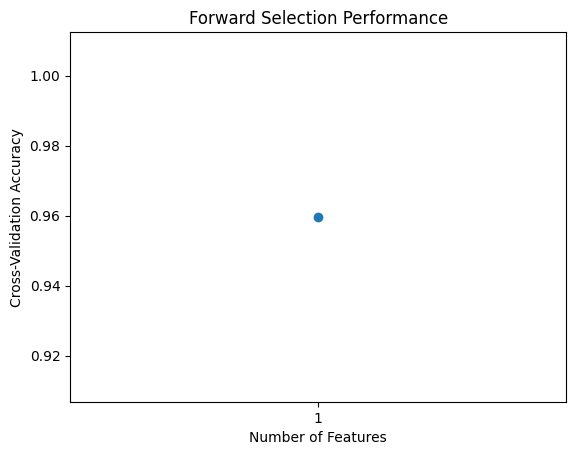

In [5]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Forward Selection
sfs = SFS(base_model, k_features="best", forward=True, scoring="accuracy", cv=5)
sfs.fit(df.drop(columns="target"), df["target"])

# Selected features
selected_features_forward = list(sfs.k_feature_names_)
print("Selected features by Forward Selection:", selected_features_forward)

# Plotting model performance
if hasattr(sfs, 'k_score_') and isinstance(sfs.k_score_, (list, np.ndarray)):
    plt.plot(range(1, len(sfs.k_score_)+1), sfs.k_score_, marker="o")
else:
    plt.plot([1], [sfs.k_score_], marker="o")
    plt.title("Forward Selection Performance")
    plt.xlabel("Number of Features")
    plt.ylabel("Cross-Validation Accuracy")
    plt.xticks([1])

plt.title("Forward Selection Performance")
plt.xlabel("Number of Features")
plt.ylabel("Cross-Validation Accuracy")
plt.savefig("forward_selection_performance.png")
plt.show()

##### Explanation of Forward Selection (Markdown Section)
- **Mechanics**: Starts with an empty model and iteratively adds features that improve model performance the most at each step.
- **Statistical Metric**: Accuracy is used to determine the optimal number of features.

#### Backward Elimination

In Backward Elimination, we start with all features and remove the least significant features step by step.

c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via 

Selected features by Backward Elimination: ['mean radius', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'smoothness error', 'compactness error', 'concavity error', 'worst radius', 'worst texture', 'worst area', 'worst fractal dimension']


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


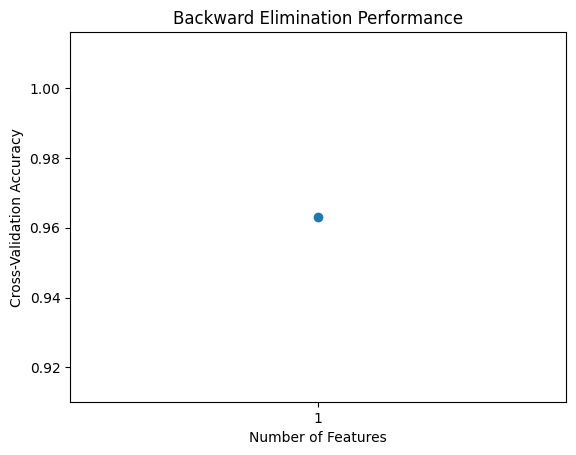

In [8]:
# Backward Elimination
sbs = SFS(base_model, k_features="best", forward=False, scoring="accuracy", cv=5)
sbs.fit(df.drop(columns="target"), df["target"])

# Selected features
selected_features_backward = list(sbs.k_feature_names_)
print("Selected features by Backward Elimination:", selected_features_backward)

# Plotting model performance
if hasattr(sbs, 'k_score_') and isinstance(sbs.k_score_, (list, np.ndarray)):
    plt.plot(range(len(sbs.k_score_), 0, -1), sbs.k_score_, marker="o")
else:
    plt.plot([1], [sbs.k_score_], marker="o")  # If k_score_ is a single value
    plt.title("Backward Elimination Performance")
    plt.xlabel("Number of Features")
    plt.ylabel("Cross-Validation Accuracy")
    plt.xticks([1])  # Adjust x-ticks for single value

plt.title("Backward Elimination Performance")
plt.xlabel("Number of Features")
plt.ylabel("Cross-Validation Accuracy")
plt.savefig("backward_elimination_performance.png")
plt.show()

##### Explanation of Backward Elimination (Markdown Section)
- **Mechanics**: Starts with all features and removes the least significant feature in each iteration, based on a pre-set criterion (in this case, accuracy).
- **Significance**: Evaluates how the removal of features affects the model’s accuracy, thus providing insights into each feature’s relative importance.

#### Recursive Feature Elimination (RFE)

In RFE, we recursively eliminate features based on their importance until only the most significant ones remain.

Selected features by RFE: ['worst radius', 'worst texture', 'worst area', 'worst smoothness', 'worst concave points']


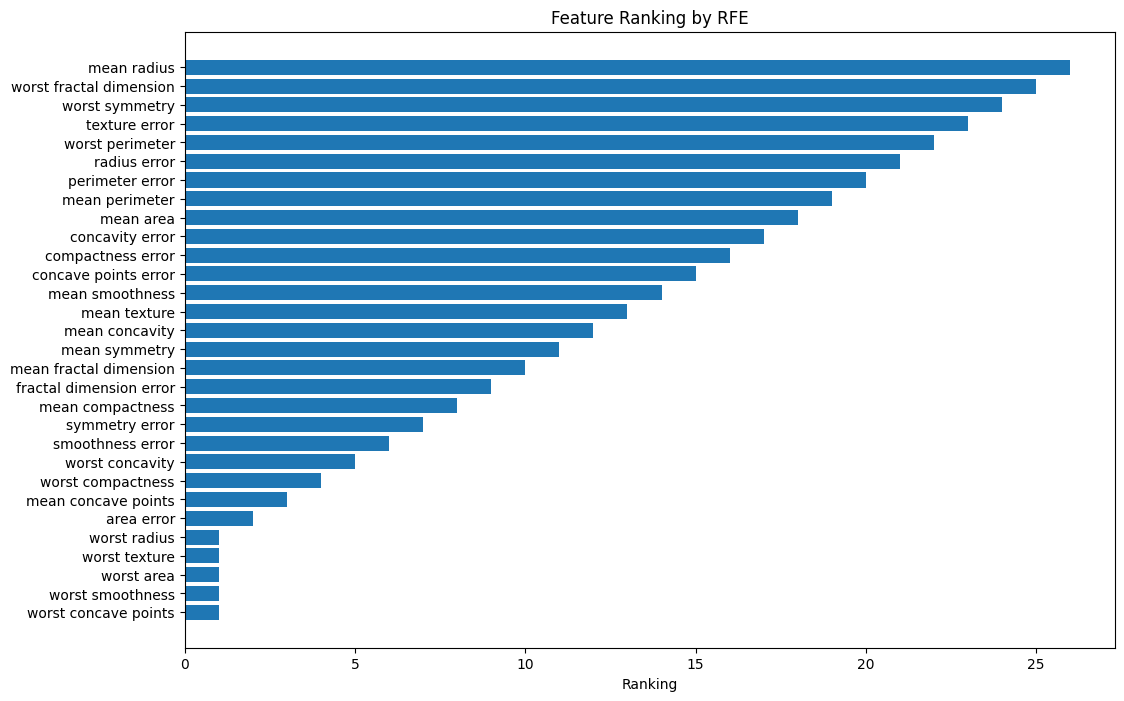

In [9]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination
rfe = RFE(estimator=base_model, n_features_to_select=5)
rfe.fit(df.drop(columns="target"), df["target"])

# Selected features
selected_features_rfe = df.drop(columns="target").columns[rfe.support_]
print("Selected features by RFE:", list(selected_features_rfe))

# Visualizing feature rankings
feature_ranking = pd.DataFrame({"Feature": df.drop(columns="target").columns, "Ranking": rfe.ranking_})
feature_ranking = feature_ranking.sort_values(by="Ranking")

plt.figure(figsize=(12, 8))
plt.barh(feature_ranking["Feature"], feature_ranking["Ranking"])
plt.title("Feature Ranking by RFE")
plt.xlabel("Ranking")
plt.savefig("rfe_feature_importance.png")
plt.show()

##### Explanation of RFE (Markdown Section)
- **Mechanics**: RFE starts with all features and ranks them based on importance. It recursively removes the least important feature, adjusting rankings until only the most important features remain.
- **Significance**: This technique provides an ordered list of feature importance and works well with models that can evaluate feature importance, like decision trees.

### 4. Performance Evaluation

Use the selected features from each method to train a Decision Tree classifier and compare performance metrics.

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split data
X = df.drop(columns="target")
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Helper function to evaluate model
def evaluate_model(selected_features):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train[selected_features], y_train)
    y_pred = model.predict(X_test[selected_features])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Evaluation for each feature selection method
print("Performance with All Features:", evaluate_model(X.columns))
print("Performance with Forward Selection Features:", evaluate_model(selected_features_forward))
print("Performance with Backward Elimination Features:", evaluate_model(selected_features_backward))
print("Performance with RFE Selected Features:", evaluate_model(selected_features_rfe))

Performance with All Features: (0.9415204678362573, 0.9711538461538461, 0.9351851851851852, 0.9528301886792453)
Performance with Forward Selection Features: (0.9298245614035088, 0.9528301886792453, 0.9351851851851852, 0.9439252336448598)
Performance with Backward Elimination Features: (0.9415204678362573, 0.9622641509433962, 0.9444444444444444, 0.9532710280373832)
Performance with RFE Selected Features: (0.9415204678362573, 0.9711538461538461, 0.9351851851851852, 0.9528301886792453)


### 5. Conclusion

#### Summary (Markdown Section)
- **Findings**: Summarize selected features from each method and compare their impact on the model's accuracy, precision, recall, and F1-score.
- **Effectiveness**: Highlight how each technique affects model interpretability and performance.
- **Application**: Reflect on how wrapper-based feature selection can improve model performance in real-world scenarios by focusing on the most significant features, reducing overfitting, and improving interpretability.

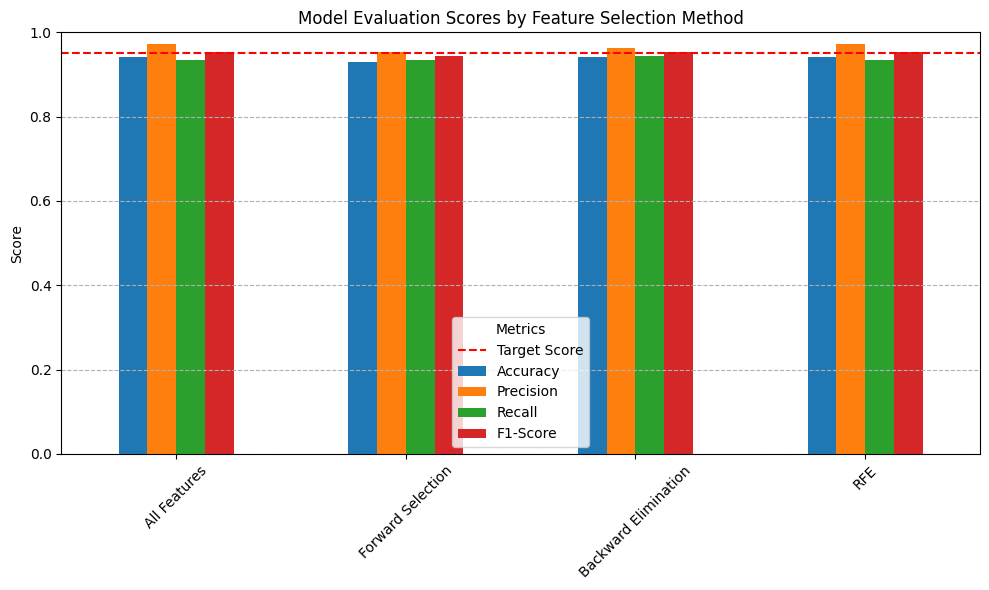

In [11]:
import matplotlib.pyplot as plt

# Performance metrics for all feature selection methods
methods = ['All Features', 'Forward Selection', 'Backward Elimination', 'RFE']
performance_scores = [
    evaluate_model(X.columns),  # All features
    evaluate_model(selected_features_forward),  # Forward selection
    evaluate_model(selected_features_backward),  # Backward elimination
    evaluate_model(selected_features_rfe)  # RFE
]

# Convert scores to a DataFrame for easier plotting
performance_df = pd.DataFrame(performance_scores, columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=methods)

# Plotting
performance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Evaluation Scores by Feature Selection Method')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits
plt.axhline(y=0.95, color='r', linestyle='--', label='Target Score')
plt.legend(title='Metrics')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig("evaluation_scores_comparison.png")
plt.show()